In [13]:
# funcions i paquets per a visualitzacio
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# paquet per a manipulacio de dades
import pandas as pd

import numpy as np

# funcions i paquets per a carregar datasets especifics (exemples simples)
from sklearn import datasets

# funcions per a partició de dades
from sklearn.model_selection import train_test_split
# funcions per a classificacio kNN
from sklearn.tree import DecisionTreeClassifier
# funcions per a classificacio kNN
from sklearn.neighbors import KNeighborsClassifier
# funcions per a metriques de rendiment
from sklearn.metrics import accuracy_score,  precision_score, roc_curve,roc_auc_score, auc, recall_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_recall_curve
from sklearn import preprocessing

#funcions per a la validació creuada
from sklearn.model_selection import cross_val_score

from sklearn import metrics

### Carreguem la base de dades, començarem amb el dataset binari

In [2]:
# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('./Data/fashion-mnist_train_small_binary.csv')
y = dataset["label"].to_numpy()
X = dataset.drop("label", axis="columns").to_numpy()


print(f'tamany de les dades: {X.shape}')
print(f'Caracteristiques: \n {y}')
print("Dimensionalitat de la BBDD:", dataset.shape)

tamany de les dades: (600, 784)
Caracteristiques: 
 [1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1

In [3]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
KNNmodel = KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(x_train,y_train)

KNeighborsClassifier()

### Comprovem l'accuracy amb el classificador KNN

Accuracy:0.95
Precision:0.9874213836477987
Recall:0.9573170731707317


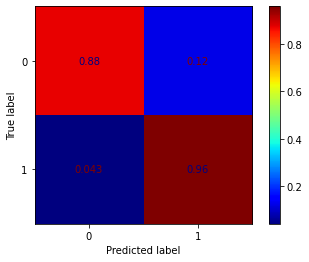

In [5]:
KNNpredictions = KNNmodel.predict(x_test)
KNNacc = accuracy_score(y_test, KNNpredictions)
KNNprec = precision_score(y_test, KNNpredictions)
KNNrec = recall_score(y_test, KNNpredictions)
KNNconf_mat = confusion_matrix(y_test, KNNpredictions).T

print(f'Accuracy:{KNNacc}')
print(f'Precision:{KNNprec}')
print(f'Recall:{KNNrec}')
plot_confusion_matrix(KNNmodel, x_test, y_test, normalize='true', cmap='jet')


El classificador KNN amb el dataset binari ens dona un 95% d'accuracy

### Comprovem l'accuracy amb el classificador d'arbre de decisió

La taxa d'error és de: 16.84451219512195%
L'accuracy' és de: 95.0%


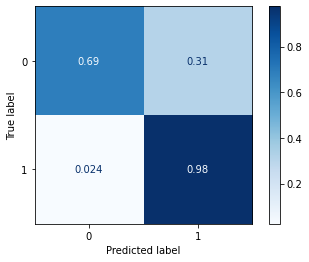

In [15]:
dec_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dec_tree.fit(x_train, y_train)
y_pred = dec_tree.predict(x_test)

error = plot_confusion_matrix(dec_tree, x_test, y_test, normalize='true', cmap=plt.cm.Blues)
error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))

acc = metrics.accuracy_score(y_test, y_pred)


print(f"La taxa d'error és de: {error*100}%")

print(f"L'accuracy' és de: {acc*100}%")

L'accuracy del classificador KNN i del decision tree són els mateixos (95%), el que ens fa pensar que tant un com l'altre en un mètode simple ens donarien resultats molt similars.

### Aplicant l'Adaboost

La taxa d'error amb 1 és de: 93.88888888888889%
La taxa d'error amb 51 és de: 95.0%
La taxa d'error amb 101 és de: 95.55555555555556%
La taxa d'error amb 151 és de: 95.55555555555556%
La taxa d'error amb 201 és de: 96.11111111111111%
La taxa d'error amb 251 és de: 95.0%
La taxa d'error amb 301 és de: 95.55555555555556%
La taxa d'error amb 351 és de: 95.55555555555556%
La taxa d'error amb 401 és de: 95.0%
La taxa d'error amb 451 és de: 95.0%


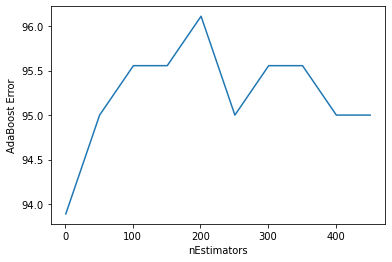

In [14]:
from sklearn.ensemble import AdaBoostClassifier

est_range = range(1,501,50)
est_errors = []

for estimators in est_range:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators = estimators);
    ada_boost.fit(x_train, y_train)
    y_pred = ada_boost.predict(x_test)
    
    
    #error = plot_confusion_matrix(ada_boost, x_test, y_test, normalize='true', cmap=plt.cm.Blues)
    #error = 1-(sum(np.diag(error.confusion_matrix)) / sum(error.confusion_matrix.ravel()))
    error = metrics.accuracy_score(y_test, y_pred)
    
    est_errors.append(error*100)
    print(f"L'accuracy amb {estimators} és de: {error*100}%")

plt.plot(est_range, est_errors)
plt.xlabel("nEstimators")
plt.ylabel("AdaBoost Accuracy")

plt.show();



Aplicant l'AdaBoost amb diferents estimadors veiem com per 200 estimadors el nostre model millora fins el 96% d'accuracy, millor que els dos models anteriors simples

### Aplicant Random Forest

L'accuracy amb 1 és de: 93.88888888888889%
L'accuracy amb 51 és de: 96.66666666666667%
L'accuracy amb 101 és de: 96.66666666666667%
L'accuracy amb 151 és de: 96.11111111111111%
L'accuracy amb 201 és de: 96.11111111111111%
L'accuracy amb 251 és de: 96.11111111111111%
L'accuracy amb 301 és de: 96.11111111111111%
L'accuracy amb 351 és de: 96.11111111111111%
L'accuracy amb 401 és de: 96.11111111111111%
L'accuracy amb 451 és de: 96.11111111111111%


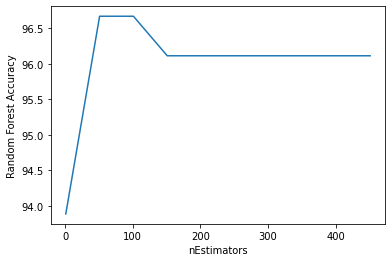

In [18]:
from sklearn.ensemble import RandomForestClassifier

est_range = range(1,501,50)
est_errors = []

for estimators in est_range:
    random_forest = RandomForestClassifier(n_estimators=estimators, max_features=0.1, random_state=42)
    random_forest.fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    
    error = metrics.accuracy_score(y_test, y_pred)
    
    est_errors.append(error*100)
    print(f"L'accuracy amb {estimators} és de: {error*100}%")
    
    
plt.plot(est_range, est_errors)
plt.xlabel("nEstimators")
plt.ylabel("Random Forest Accuracy")

plt.show();

Al observar els resultats del Random Forest podem veure com aquest arriba a un màxim d'accuracy del 96,67%, millorant aixì els dos mètodes simples i l'AdaBoost.

### Importància de les característiques

Observem el pes de les característiques en els dos mètodes aplicats

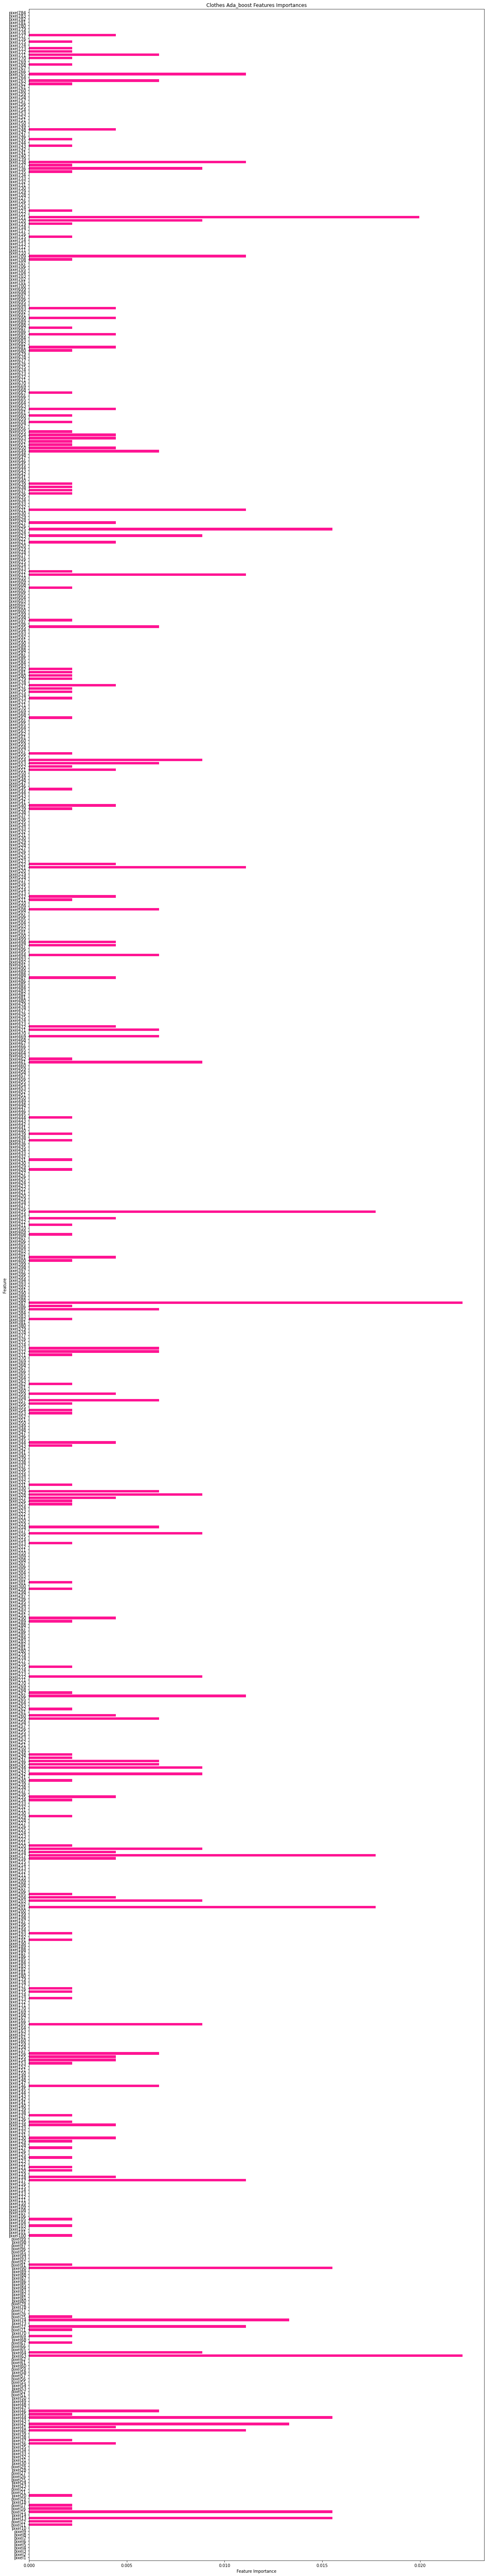

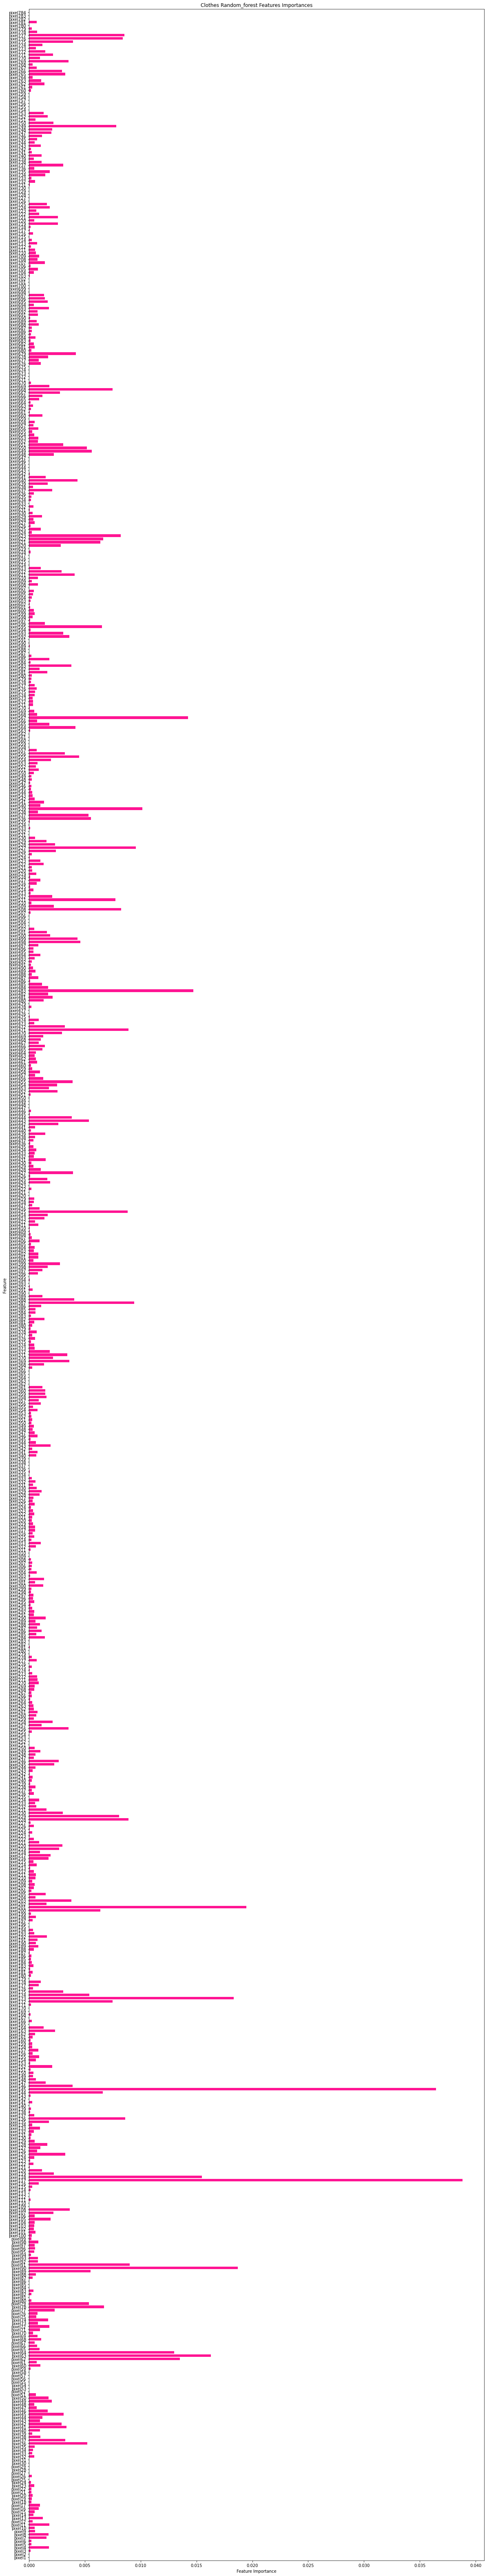

In [53]:
def clothes_feature_importance_plot(model, nom_model):
    plt.figure(figsize=(20,115))
    n_features = len(dataset.columns.values)-1
    plt.barh(range(n_features), model.feature_importances_, align='center', color=['#FF1493'])
    plt.yticks(np.arange(n_features), dataset.columns.values[1:])
    plt.title('Clothes ' + str(nom_model)+ ' Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
clothes_feature_importance_plot(ada_boost, "Ada_boost")
plt.show()

clothes_feature_importance_plot(random_forest, "Random_forest")
plt.show()